
# **CLASSIFICATION**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1)Choose; Load; Inspect and Explore your Data

**Importing the required libraries**

In [ ]:
import numpy as np # Importing numpy library for numerical computing
import pandas as pd # Importing pandas library for data manipulation and analysis, including reading CSV files
import matplotlib.pyplot as plt # Importing matplotlib library for plotting charts
import seaborn as sns # Importing seaborn library for enhanced data visualization capabilities


**Loading the dataset**

In [ ]:
df=pd.read_csv("diabetes.csv")

The diabetes dataset is read from a CSV file and data is loaded into a pandas DataFrame named 'df' for further analysis and manipulation


**Head of the dataset**

In [ ]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Getting the first five head of the dataset in order to get familiar with the dataset

**Shape of the data set**

In [ ]:
df.shape

(768, 9)

Number of rows in the dataset is 768 and no of columns is 9

**Columns of dataset**

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

These are the names of the column which is present in the dataset

**Information about data set**

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

This shows the datatype of the columns.Here most of the datatype is integer and two of them are float

**Summary of the data set**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


This shows the data information if there is null or not and its number

All columns have numerical data types, indicating that the dataset primarily consists of numerical features.

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


*   count: Number of non-null values in the column.
*   mean: Mean or average value of the column.
*   std: Standard deviation, a measure of the dispersion of values around the mean.
*   min: Minimum value in the column.
*   25%: 25th percentile or first quartile.
*   50%: Median or 50th percentile.
*   75%: 75th percentile or third quartile.
*   max: Maximum value in the column.








This shows the given information of the data like count ,mean ,etc which is helpful to understand the data and possibly helpful with dealing with the outliers or missing values as well.

Here in the dataset you can see that there are certain columns which has value as 0.As we know that medically it is impossible for the value to be 0 in this case so what we do is data cleaning.In data cleaning  we replace the value 0 with mean and median which is based on the distribution.Also some columns have higher value than it is supposed to be so for that outliers we handle it by removing as well.

**Data Cleaning**

**Dropping duplicate values**

In [ ]:
df=df.drop_duplicates()

Here the duplicate values are being dropped.

**Checking NULL values**

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There is no null value in the dataset so we dont have to deal with it

**Checking for column having value 0**

In [ ]:
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

35
5
227
374
11


This is for checking the columns having value 0.As from the above we know that age,diabetespedigreefunction and pregancy column dont have any 0 value so we dont check for it

Some of the columns have a skewed distribution, so the mean is more affected by outliers than the median. Glucose and Blood Pressure have normal distributions hence we replace 0 values in those columns by mean value. SkinThickness, Insulin,BMI have skewed distributions hence median is a better choice as it is less affected by outliers.

**Replacing 0 values with median and median**

It isn't medically possible for some data record to have 0 value such as Blood Pressure or Glucose levels. Hence we replace them with the mean value of that particular column.

In [ ]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())#normal distribution
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())#normal distribution
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())#skewed distribution
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())#skewed distribution
df['BMI']=df['BMI'].replace(0,df['BMI'].median())#skewed distribution

**Data Visualization**

<Axes: xlabel='Outcome', ylabel='count'>

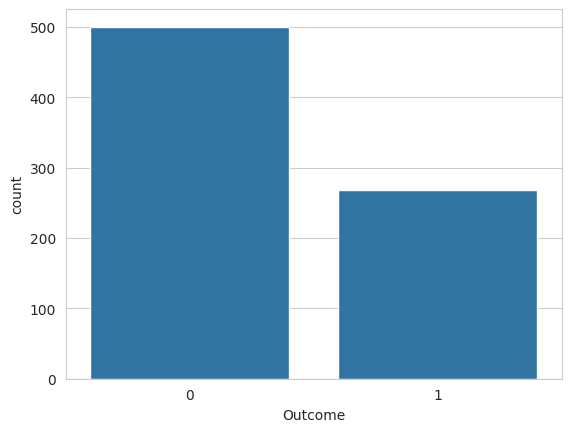

In [ ]:
sns.countplot(x='Outcome', data=df)

This show the count of outcome for 0 and 1 .Fromt he figure we can see that no of 0 is 500 and no of 1 is close to 300

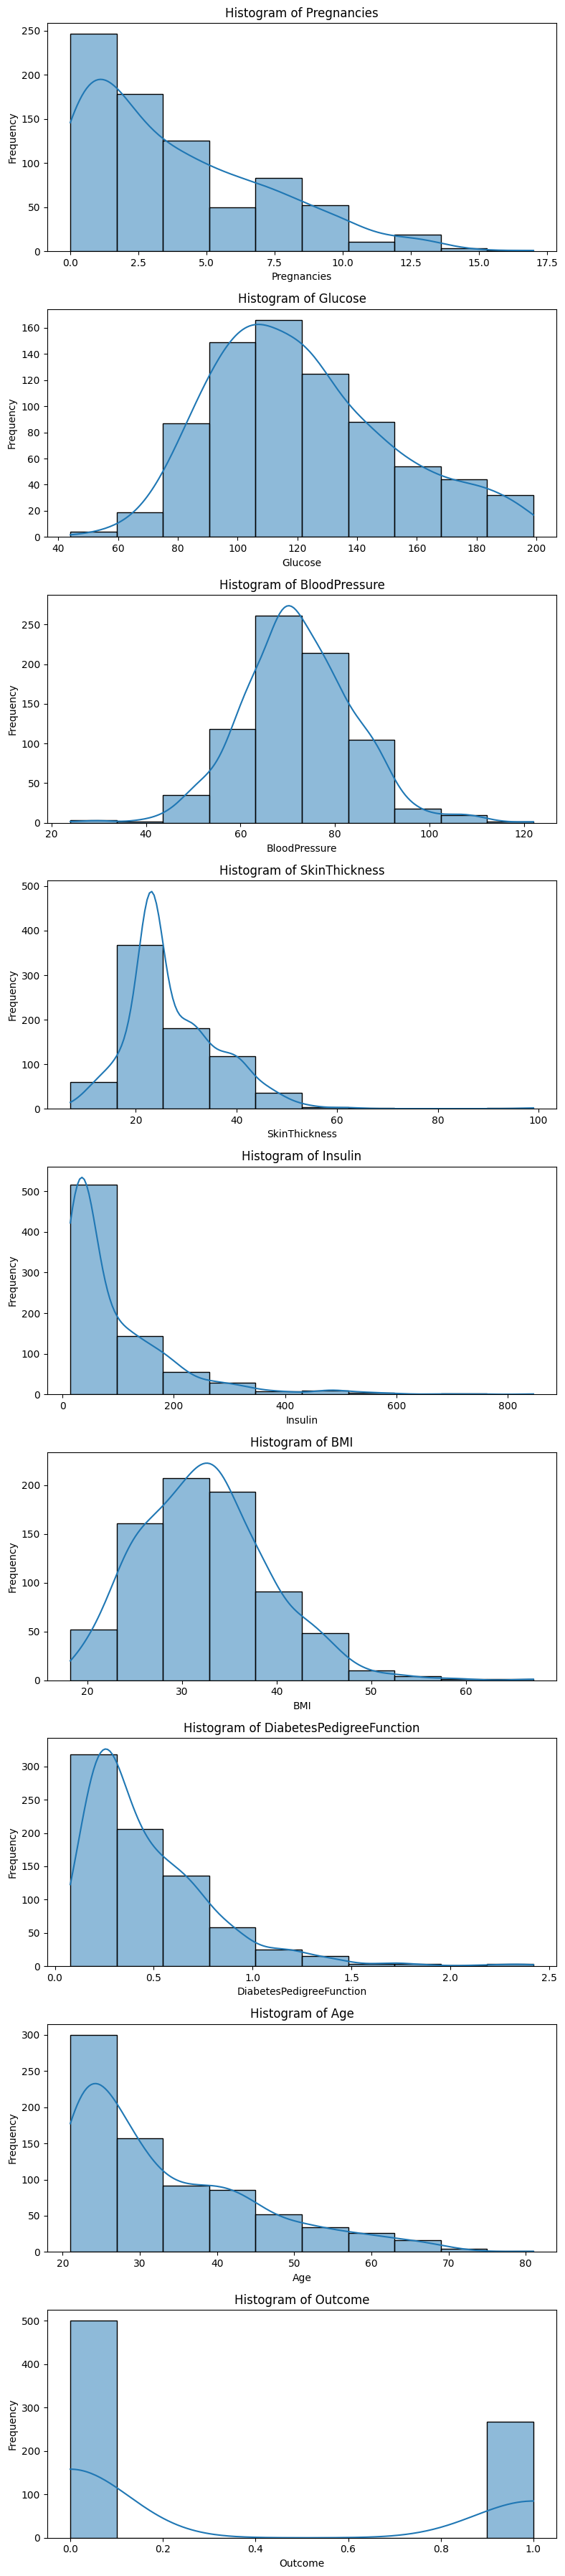

In [ ]:
# Assuming df is your DataFrame
numerical_variables = df.select_dtypes(include=['int64', 'float64']).columns

# Set up subplots with a smaller size
fig, axes = plt.subplots(nrows=len(numerical_variables), figsize=(8, 4*len(numerical_variables)))

# Create histograms for each numerical variable
for ax, column in zip(axes.flatten(), numerical_variables):
    sns.histplot(df[column], bins=10, kde=True, ax=ax)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Here the histogram of pregnancy is positively skewed
histogram of diabetespedigreefunction and insulin is also positively skewed.

<Axes: xlabel='DiabetesPedigreeFunction'>

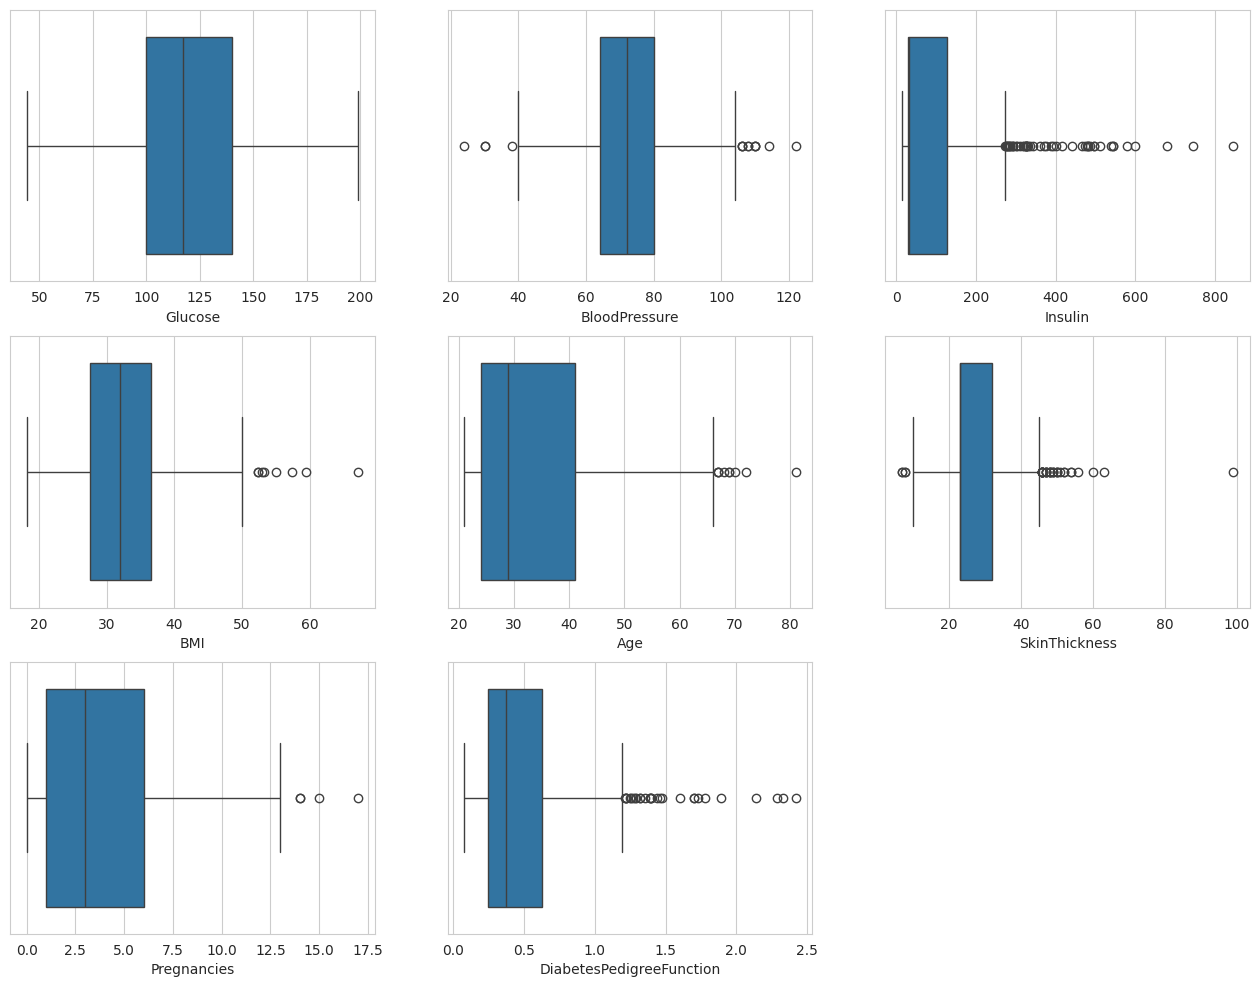

In [ ]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

These figure shows the outliers present in the each of the column of the database

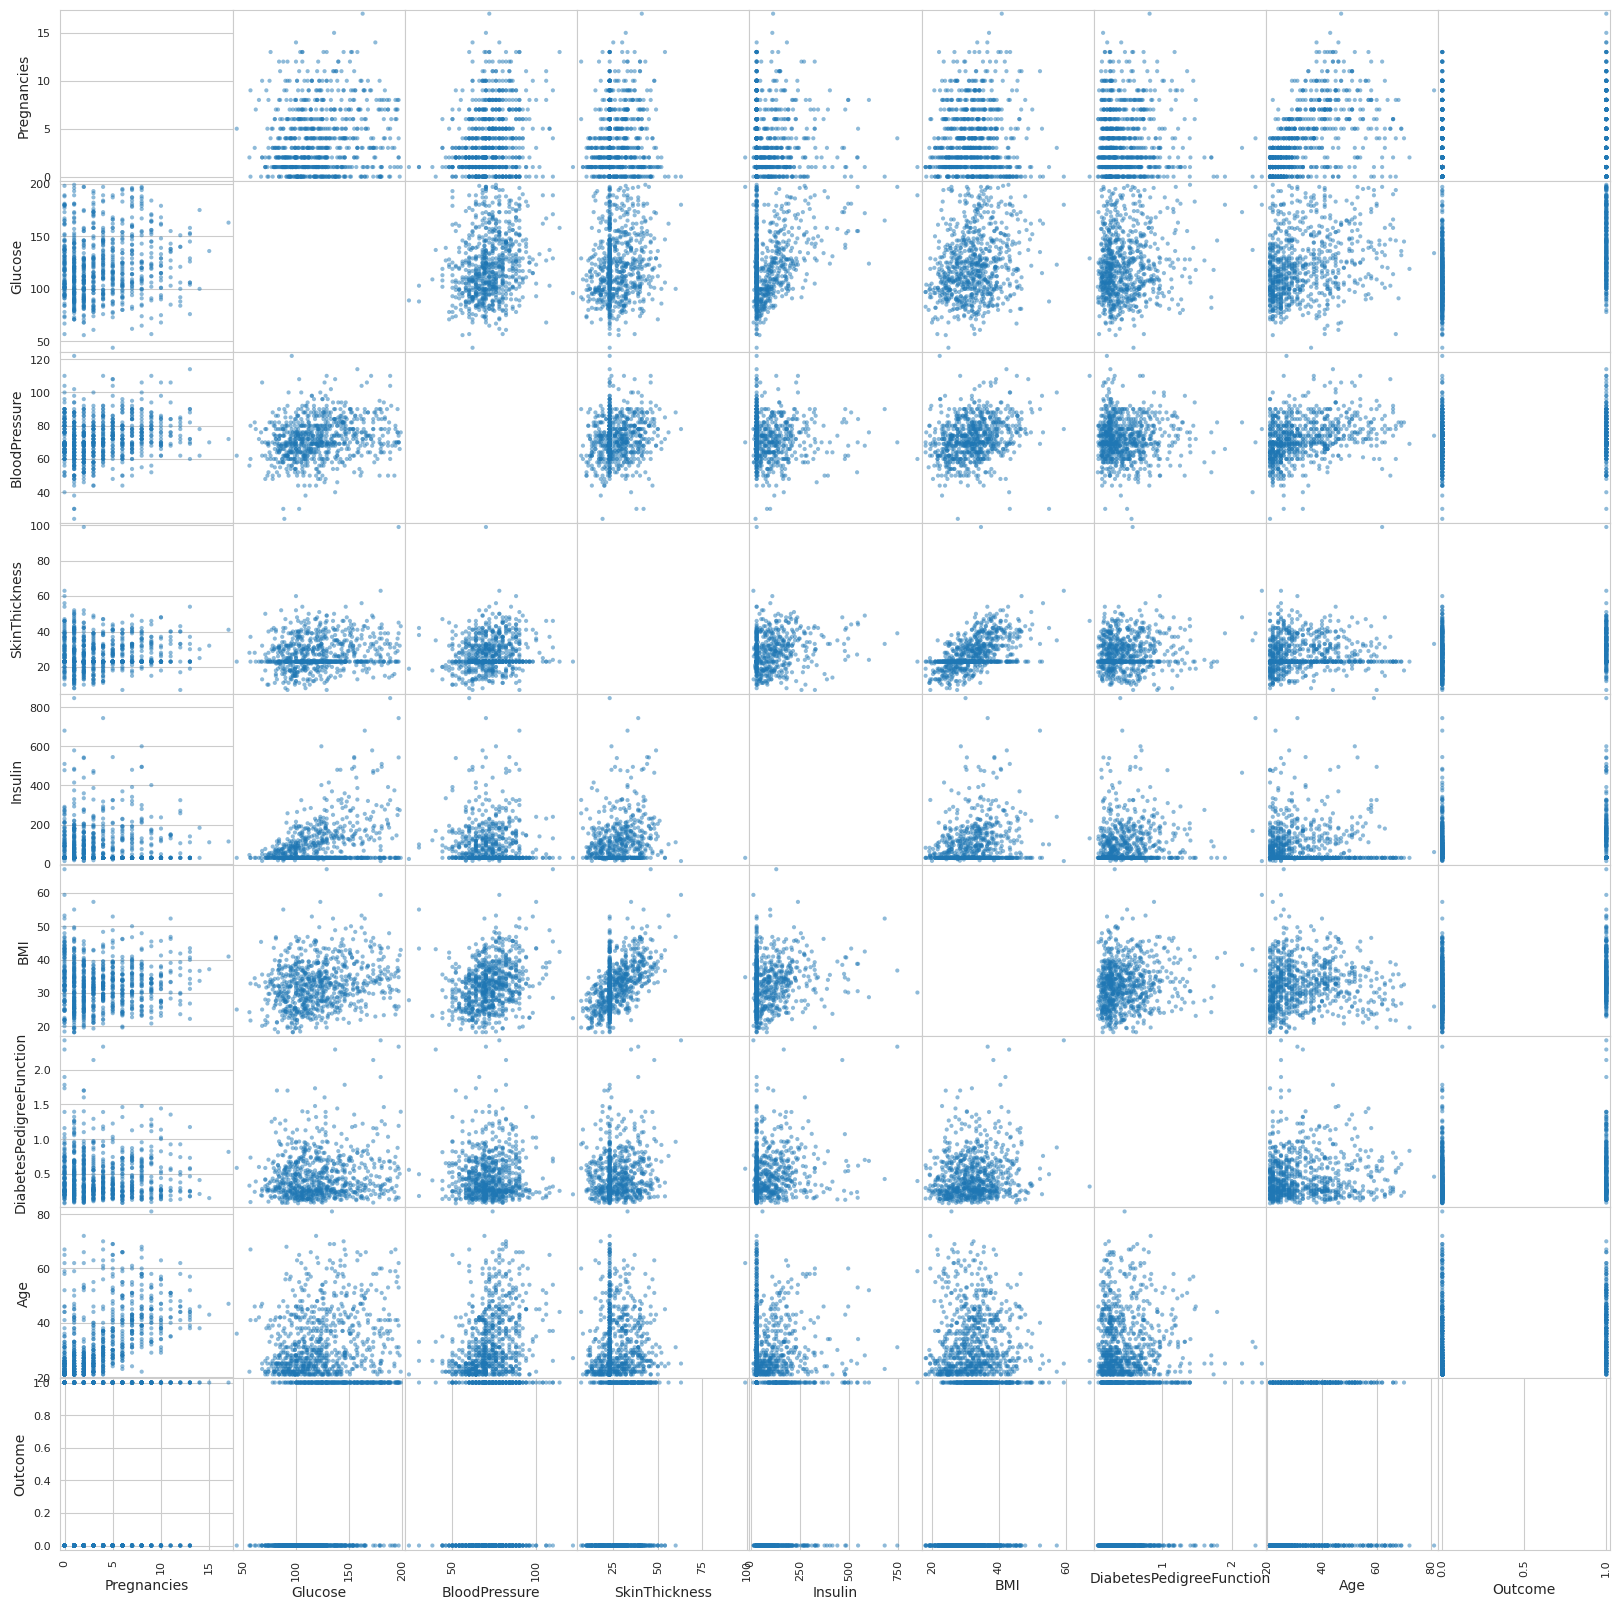

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(20, 20), diagonal='None');


This above diagram of the scatterplot shows the relation of the variables.For example pregnancy and pregnancy doesn't have any kind of relation .It also helps to figure out the outliers

<Axes: >

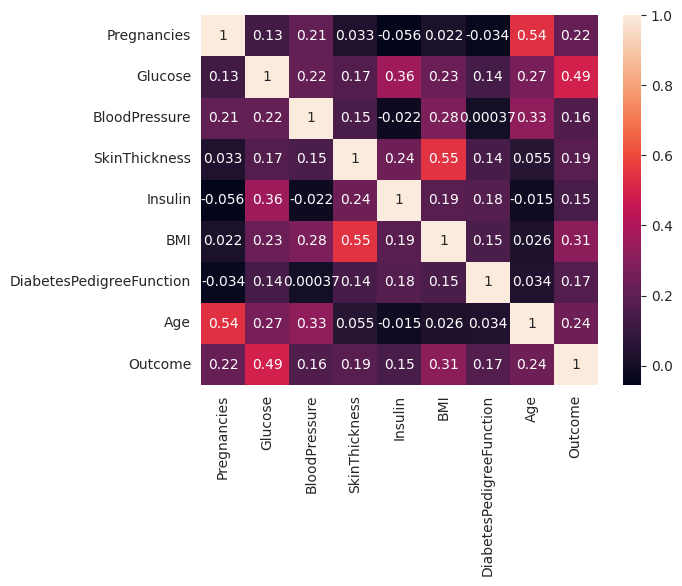

In [ ]:
corrmat=df.corr()
sns.heatmap(corrmat, annot=True)

This is visualizing the correlation matrix as a heatmap.Here you can see that the value of Pearson correlation coefficient and figure out the relation between the variables.

1=perfect positive linear relationship

-1= perfect negative linear relationship

0=no linear relationship

For example insulin and insulin has no relationship as its Pearson correlation coefficient is 0.

In [ ]:
df_selected=df.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis='columns')

In [ ]:
from sklearn.preprocessing import QuantileTransformer
x=df_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['Pregnancies', 'Glucose','SkinThickness','BMI','Age','Outcome']

Transforming the data for uniform distribution

<Axes: xlabel='SkinThickness'>

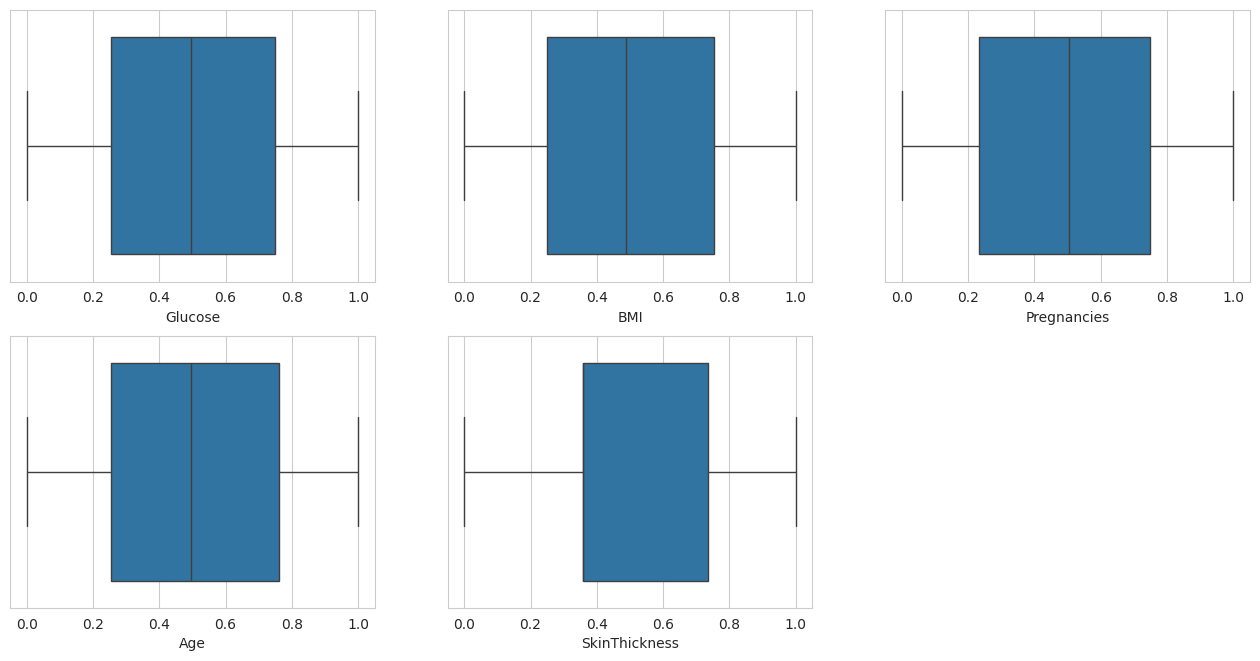

In [ ]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x=df_new['Glucose'],data=df_new)
plt.subplot(3,3,2)
sns.boxplot(x=df_new['BMI'],data=df_new)
plt.subplot(3,3,3)
sns.boxplot(x=df_new['Pregnancies'],data=df_new)
plt.subplot(3,3,4)
sns.boxplot(x=df_new['Age'],data=df_new)
plt.subplot(3,3,5)
sns.boxplot(x=df_new['SkinThickness'],data=df_new)

Here you can see that after data cleaning the outliers have been remove from the dataset

#2)Build Primary Model

**Split the Data Frame into X and y**

In [ ]:
target_name='Outcome'
y= df_new[target_name]
X=df_new.drop(target_name,axis=1)

In [ ]:
X.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age
0,0.747718,0.810300,0.801825,0.591265,0.889831
1,0.232725,0.091265,0.644720,0.213168,0.558670
2,0.863755,0.956975,0.357888,0.077575,0.585398
3,0.232725,0.124511,0.357888,0.284224,0.000000
4,0.000000,0.721643,0.801825,0.926988,0.606258


Looking at the head of the data of X

In [ ]:
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Outcome, dtype: float64

gives the head of y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train.shape,y_train.shape

((614, 5), (614,))

In [ ]:
X_test.shape,y_test.shape

((154, 5), (154,))

**Build Primary Model:**

Accuracy of Logistic Regression Model on Test Dataset: 0.7922077922077922
Classification Report for Logistic Regression Model on Test Dataset:
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       107
         1.0       0.69      0.57      0.63        47

    accuracy                           0.79       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.79      0.79      0.79       154



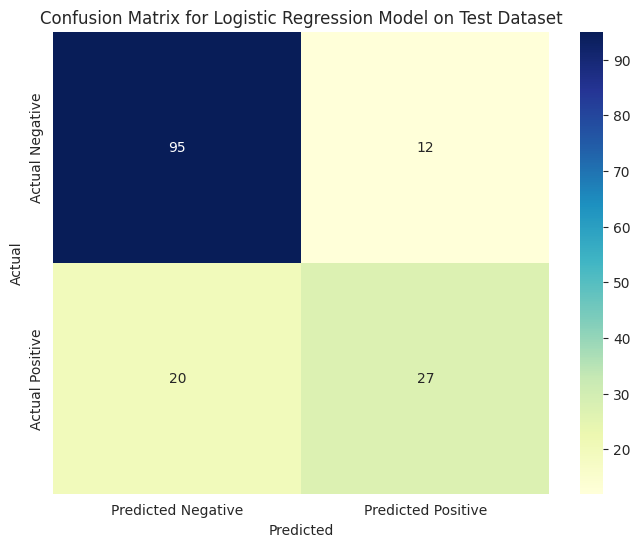


Accuracy of Logistic Regression Model on Train Dataset: 0.762214983713355
Classification Report for Logistic Regression Model on Train Dataset:
              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82       393
         1.0       0.69      0.62      0.65       221

    accuracy                           0.76       614
   macro avg       0.74      0.73      0.74       614
weighted avg       0.76      0.76      0.76       614



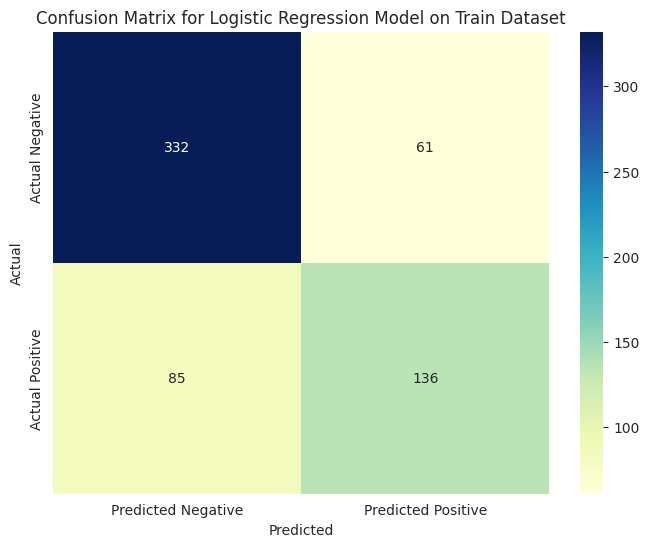

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Logistic Regression Model
logistic_model = LogisticRegression(random_state=0)
logistic_model.fit(X_train, y_train)

# Predict using the Logistic Regression model on test dataset
y_pred_logistic_test = logistic_model.predict(X_test)

# Evaluate Logistic Regression Model on test dataset
accuracy_logistic_test = accuracy_score(y_test, y_pred_logistic_test)
print("Accuracy of Logistic Regression Model on Test Dataset:", accuracy_logistic_test)
print("Classification Report for Logistic Regression Model on Test Dataset:")
print(classification_report(y_test, y_pred_logistic_test))

# Calculate confusion matrix for test dataset
conf_matrix_logistic_test = confusion_matrix(y_test, y_pred_logistic_test)

# Plot confusion matrix with labels for test dataset
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic_test, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for Logistic Regression Model on Test Dataset')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Predict using the Logistic Regression model on train dataset
y_pred_logistic_train = logistic_model.predict(X_train)

# Evaluate Logistic Regression Model on train dataset
accuracy_logistic_train = accuracy_score(y_train, y_pred_logistic_train)
print("\nAccuracy of Logistic Regression Model on Train Dataset:", accuracy_logistic_train)
print("Classification Report for Logistic Regression Model on Train Dataset:")
print(classification_report(y_train, y_pred_logistic_train))

# Calculate confusion matrix for train dataset
conf_matrix_logistic_train = confusion_matrix(y_train, y_pred_logistic_train)

# Plot confusion matrix with labels for train dataset
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic_train, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for Logistic Regression Model on Train Dataset')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


This is a logistic regression model done on train and test dataset.The accuracy of the logistic regression model on the test dataset is approximately 79.22%.
The accuracy of the logistic regression model on the train dataset is approximately 76.22%


Accuracy of K-Nearest Neighbors Classifier on Test Dataset: 0.7792207792207793
Classification Report for K-Nearest Neighbors Classifier on Test Dataset:
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84       107
         1.0       0.65      0.60      0.62        47

    accuracy                           0.78       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.77      0.78      0.78       154



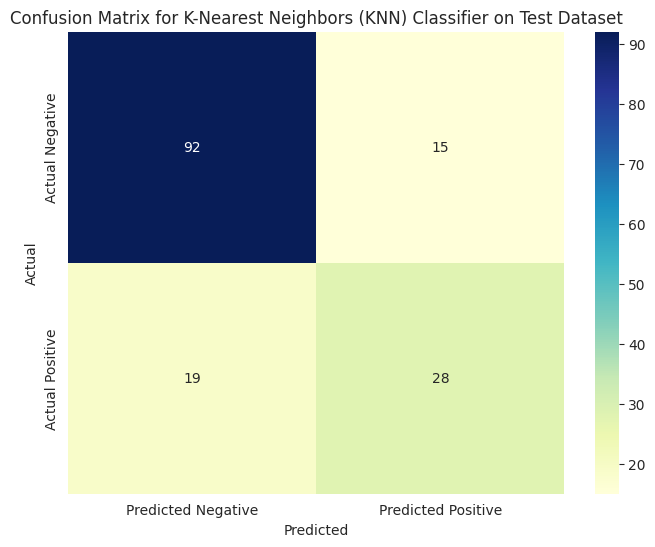


Accuracy of K-Nearest Neighbors Classifier on Train Dataset: 0.8029315960912052
Classification Report for K-Nearest Neighbors Classifier on Train Dataset:
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       393
         1.0       0.74      0.70      0.72       221

    accuracy                           0.80       614
   macro avg       0.79      0.78      0.78       614
weighted avg       0.80      0.80      0.80       614



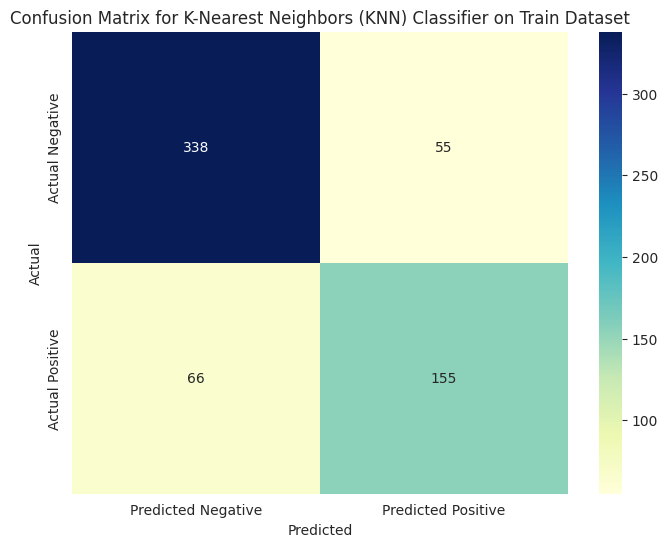

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predict using the KNN model on test dataset
y_pred_knn_test = knn_model.predict(X_test)

# Evaluate K-Nearest Neighbors Classifier on test dataset
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("\nAccuracy of K-Nearest Neighbors Classifier on Test Dataset:", accuracy_knn_test)
print("Classification Report for K-Nearest Neighbors Classifier on Test Dataset:")
print(classification_report(y_test, y_pred_knn_test))

# Calculate confusion matrix for test dataset
conf_matrix_knn_test = confusion_matrix(y_test, y_pred_knn_test)

# Plot confusion matrix with labels for test dataset
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn_test, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for K-Nearest Neighbors (KNN) Classifier on Test Dataset')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Predict using the KNN model on train dataset
y_pred_knn_train = knn_model.predict(X_train)

# Evaluate K-Nearest Neighbors Classifier on train dataset
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("\nAccuracy of K-Nearest Neighbors Classifier on Train Dataset:", accuracy_knn_train)
print("Classification Report for K-Nearest Neighbors Classifier on Train Dataset:")
print(classification_report(y_train, y_pred_knn_train))

# Calculate confusion matrix for train dataset
conf_matrix_knn_train = confusion_matrix(y_train, y_pred_knn_train)

# Plot confusion matrix with labels for train dataset
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn_train, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for K-Nearest Neighbors (KNN) Classifier on Train Dataset')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Based on these metrics, the Logistic Regression Model performed slightly better than the K-Nearest Neighbors Classifier in terms of accuracy (0.7922 vs. 0.7792), precision, and recall for the positive class (class 1). Therefore, the Logistic Regression Model is the better-performing model for this dataset.the KNN classifier achieves slightly lower accuracy on the test dataset compared to the logistic regression model, but it demonstrates competitive performance in terms of precision, recall, and F1-score.

#3)Hyper-parameter Optimization with Cross-Validation

Logistic Regression Hyperparameter Optimization

Now we use GridSearchCV method for optimizing the hyperparameters so that we know which is the best hyperparameters in order to use in our final model.This is done for both logistic regression and KNN.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define hyperparameters grid for Logistic Regression
logistic_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Perform GridSearchCV for Logistic Regression
logistic_grid_search = GridSearchCV(LogisticRegression(random_state=0), logistic_param_grid, cv=5)
logistic_grid_search.fit(X_train, y_train)

# Print best hyperparameters for Logistic Regression
print("Best hyperparameters for Logistic Regression:", logistic_grid_search.best_params_)

# Predict with best Logistic Regression model
best_logistic_model = logistic_grid_search.best_estimator_
y_pred_logistic = best_logistic_model.predict(X_test)

# Evaluate best Logistic Regression model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("\nAccuracy of best Logistic Regression Model:", accuracy_logistic)
print("Classification Report for best Logistic Regression Model:")
print(classification_report(y_test, y_pred_logistic))


Best hyperparameters for Logistic Regression: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

Accuracy of best Logistic Regression Model: 0.7987012987012987
Classification Report for best Logistic Regression Model:
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86       107
         1.0       0.71      0.57      0.64        47

    accuracy                           0.80       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.79      0.80      0.79       154



 K-Nearest Neighbors (KNN) Hyperparameter Optimization

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define hyperparameters grid for K-Nearest Neighbors
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Perform GridSearchCV for K-Nearest Neighbors
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5)
knn_grid_search.fit(X_train, y_train)

# Print best hyperparameters for K-Nearest Neighbors
print("Best hyperparameters for K-Nearest Neighbors:", knn_grid_search.best_params_)

# Predict with best K-Nearest Neighbors model
best_knn_model = knn_grid_search.best_estimator_
y_pred_knn = best_knn_model.predict(X_test)

# Evaluate best K-Nearest Neighbors model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("\nAccuracy of best K-Nearest Neighbors Classifier:", accuracy_knn)
print("Classification Report for best K-Nearest Neighbors Classifier:")
print(classification_report(y_test, y_pred_knn))


Best hyperparameters for K-Nearest Neighbors: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'uniform'}

Accuracy of best K-Nearest Neighbors Classifier: 0.8051948051948052
Classification Report for best K-Nearest Neighbors Classifier:
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86       107
         1.0       0.70      0.64      0.67        47

    accuracy                           0.81       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.80      0.81      0.80       154



#4)Feature Selection

SelectKBest and chi2 from sklearn.feature_selection: For feature selection using the chi-squared test.
SelectKBest: This is an object in scikit-learn used for feature selection. It selects the top k features based on a given score function.
chi2: This is the score function used for feature selection. It computes the chi-squared statistic between each feature and the target variable.

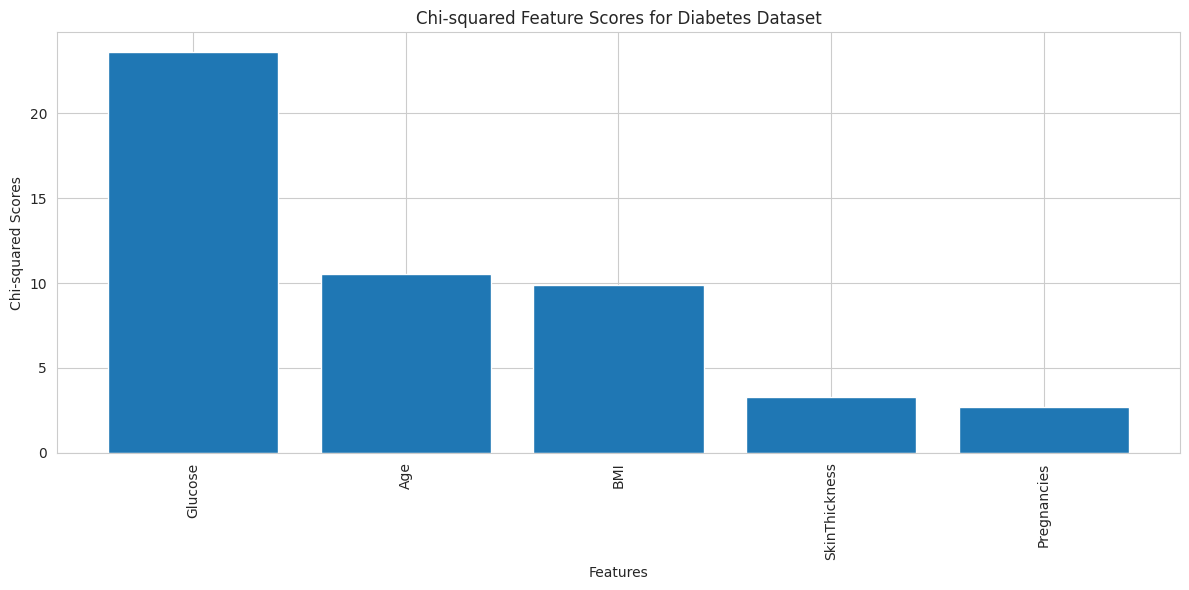

         Feature  Chi-Squared Value
1        Glucose          23.584791
4            Age          10.545717
3            BMI           9.906937
2  SkinThickness           3.266406
0    Pregnancies           2.713851


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2

# Create an instance of SelectKBest with chi2 scoring and specify k
k_best = SelectKBest(score_func=chi2, k=5)
# Fit SelectKBest on the dataset
k_best.fit(X_train, y_train)

# Get the indices of the selected features
selected_feature_indices = np.where(k_best.get_support())[0]

# Create a bar chart to visualize feature scores
feature_scores = k_best.scores_
feature_names = X.columns
sorted_indices = np.argsort(feature_scores)[::-1]
sorted_feature_scores = feature_scores[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_feature_scores)), sorted_feature_scores, tick_label=sorted_feature_names)
plt.xlabel('Features')
plt.ylabel('Chi-squared Scores')
plt.title('Chi-squared Feature Scores for Diabetes Dataset')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

# Create a dataframe to store feature names and chi-squared values
feature_df = pd.DataFrame({'Feature': feature_names, 'Chi-Squared Value': feature_scores})

# Sort the dataframe by chi-squared values in descending order
feature_df = feature_df.sort_values(by='Chi-Squared Value', ascending=False)

# Print the dataframe
print(feature_df)


Glucose:
It has the highest chi-squared value of approximately 23.58.
This suggests that the level of glucose in the blood is highly associated with the presence or absence of diabetes in the dataset.

Age:
It has a chi-squared value of approximately 10.55.
Age also shows a significant association with the presence or absence of diabetes, although to a lesser extent compared to glucose.

BMI (Body Mass Index):
It has a chi-squared value of approximately 9.91.
BMI is also found to be associated with the presence or absence of diabetes, indicating its importance as a predictive feature.

SkinThickness:
It has a chi-squared value of approximately 3.27.
Skin thickness shows a weaker association compared to glucose, age, and BMI, but it still contributes to predicting the target variable.

Pregnancies:
It has the lowest chi-squared value of approximately 2.71.
While pregnancies also show some association with diabetes, it appears to be less significant compared to other features in the dataset.

#5)Final Model

Now the final model is created for both the models used before using the best hyperparameters and best feature.

Final Logistic Regression Model

Accuracy of rebuilt Logistic Regression Model: 0.7987012987012987
Classification Report for rebuilt Logistic Regression Model:
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86       107
         1.0       0.71      0.57      0.64        47

    accuracy                           0.80       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.79      0.80      0.79       154



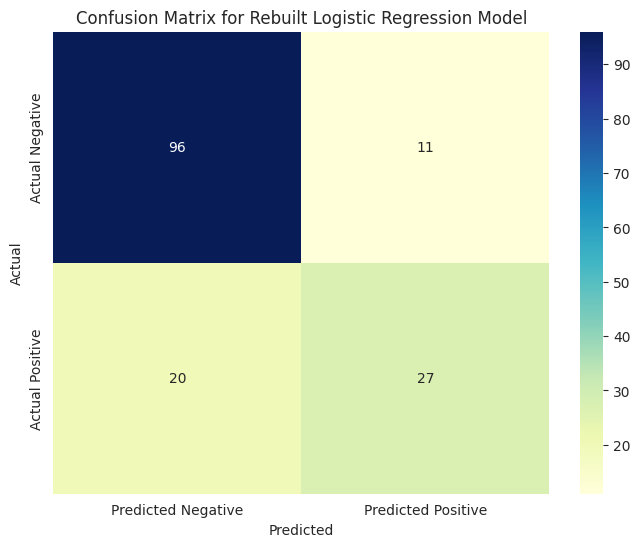

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Selected features based on chi-squared test
selected_features = ['Glucose', 'Age', 'BMI', 'SkinThickness', 'Pregnancies']

# Filter the training and test data based on selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Rebuild the Logistic Regression model with the best hyperparameters
best_logistic_model_rebuilt = LogisticRegression(C=1, penalty='l1', solver='liblinear', random_state=0)
best_logistic_model_rebuilt.fit(X_train_selected, y_train)

# Predict with the rebuilt Logistic Regression model
y_pred_logistic_rebuilt = best_logistic_model_rebuilt.predict(X_test_selected)

# Evaluate the performance of the rebuilt Logistic Regression model
accuracy_logistic_rebuilt = accuracy_score(y_test, y_pred_logistic_rebuilt)
print("Accuracy of rebuilt Logistic Regression Model:", accuracy_logistic_rebuilt)
print("Classification Report for rebuilt Logistic Regression Model:")
print(classification_report(y_test, y_pred_logistic_rebuilt))

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict using the rebuilt Logistic Regression model
y_pred_logistic_rebuilt = best_logistic_model_rebuilt.predict(X_test_selected)

# Calculate confusion matrix
conf_matrix_logistic_rebuilt = confusion_matrix(y_test, y_pred_logistic_rebuilt)

# Plot confusion matrix with labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic_rebuilt, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for Rebuilt Logistic Regression Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Final KNN model**

Accuracy of rebuilt K-Nearest Neighbors Classifier: 0.8051948051948052
Classification Report for rebuilt K-Nearest Neighbors Classifier:
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86       107
         1.0       0.70      0.64      0.67        47

    accuracy                           0.81       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.80      0.81      0.80       154



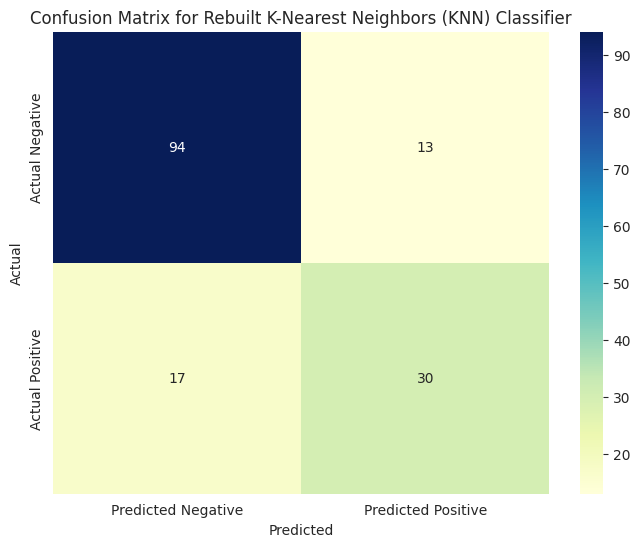

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Selected features based on the indices obtained from feature selection
selected_features = ['Glucose', 'Age', 'BMI', 'SkinThickness', 'Pregnancies']

# Select only the selected features from X_train and X_test
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Best hyperparameters obtained from grid search for KNN
best_knn_params = {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'uniform'}

# Rebuild the KNN model with the best hyperparameters
rebuilt_knn_model = KNeighborsClassifier(**best_knn_params)
rebuilt_knn_model.fit(X_train_selected, y_train)

# Predict with the rebuilt KNN model
y_pred_rebuilt_knn = rebuilt_knn_model.predict(X_test_selected)

# Evaluate the performance of the rebuilt KNN model
accuracy_rebuilt_knn = accuracy_score(y_test, y_pred_rebuilt_knn)
print("Accuracy of rebuilt K-Nearest Neighbors Classifier:", accuracy_rebuilt_knn)
print("Classification Report for rebuilt K-Nearest Neighbors Classifier:")
print(classification_report(y_test, y_pred_rebuilt_knn))
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict using the rebuilt KNN model
y_pred_rebuilt_knn = rebuilt_knn_model.predict(X_test_selected)

# Calculate confusion matrix
conf_matrix_rebuilt_knn = confusion_matrix(y_test, y_pred_rebuilt_knn)

# Plot confusion matrix with labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rebuilt_knn, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for Rebuilt K-Nearest Neighbors (KNN) Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#6)Conclusion

The KNN Classifier outperforms the Logistic Regression Model in terms of accuracy (80.52% vs. 79.87%) and F1-score for class 0 (0.86 vs. 0.86).
The Logistic Regression Model performs slightly better in terms of precision and recall for class 1 (positive class) compared to the KNN Classifier.
The hyperparameter optimization method used for both the model is gridsearchcv.And SelectKBest and chi2 from sklearn.feature_selection is used for feature selection.Doing this has increased the performance of both the models.
For logistic regression model the accuracy has increased from 0.79220 to 0.7987
For KNN classifier model the accuracy has increased from 0.77 to 0.8 .
This shows that after the optimization of hyperparameters and feature selection the model has increased its accuracy.So for future purpose it is better to use KNN classifier as it outperforms the Logistic Regression model.